In [1]:
import ocean_model_skill_assessor as omsa
import cf_pandas as cfp

# How to use `ocean-model-skill-assessor`

... as a Python package. Other notebooks describe its command line interface uses.

But, this is written in parallel to the [CLI demo](https://ocean-model-skill-assessor.readthedocs.io/en/latest/demo_cli.html), but will be more brief.

There are three steps to follow for a set of model-data validation, which is for one variable:
1. Make a catalog for your model output.
2. Make a catalog for your data.
3. Run the comparison.

These steps will save files into a user application directory cache, along with a log. A project directory can be checked on the command line with `omsa proj_path --project_name PROJECT_NAME`.


## Make model catalog

In [2]:
cat_model = omsa.make_catalog(project_name="demo_local_package", catalog_type="local", catalog_name="model", 
                  kwargs=dict(filenames="https://www.ncei.noaa.gov/thredds/dodsC/model-ciofs-agg/Aggregated_CIOFS_Fields_Forecast_best.ncd",
                              skip_entry_metadata=True),
                  kwargs_open=dict(drop_variables="ocean_time"))

In [3]:
cat_model

model:
  args:
    description: Catalog of type local.
    name: model
  description: Catalog of type local.
  driver: intake.catalog.base.Catalog
  metadata: {}


## Make data catalog 

Set up a catalog of the datasets with which you want to compare your model output. In this example, we use only known data file locations to create our catalog.

In [4]:
filenames = ["https://erddap.sensors.axds.co/erddap/tabledap/noaa_nos_co_ops_9455500.csvp?time%2Clatitude%2Clongitude%2Cz%2Csea_water_temperature&time%3E=2022-01-01T00%3A00%3A00Z&time%3C=2022-01-06T00%3A00%3A00Z",
]

cat_data = omsa.make_catalog(project_name="demo_local_package", catalog_type="local", catalog_name="local",
                        kwargs=dict(filenames=filenames), kwargs_open=dict(blocksize=None))

[2023-01-27 12:46:02,753] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:185} WARNING - Dataset noaa_nos_co_ops_9455500 had a timezone UTC which is being removed. Make sure the timezone matches the model output.


In [5]:
cat_data

local:
  args:
    description: Catalog of type local.
    name: local
  description: Catalog of type local.
  driver: intake.catalog.base.Catalog
  metadata: {}


## Run comparison

Now that the model output and dataset catalogs are prepared, we can run the comparison of the two.

At this point we need to select a single variable to compare between the model and datasets, and this requires a little extra input. Because we don't know specifics about the format of any given input data file, variables will be interpreted with some flexibility in the form of a set of regular expressions. In the present case, we will compare the water temperature between the model and the datasets (the model output and datasets selected for our catalogs should contain the variable we want to compare). Several sets of regular expressions, called "vocabularies", are available with the package to be used for this purpose, and in this case we will use one called "general" which should match many commonly-used variable names. "general" is selected under `vocab_names`, and the particular key from the general vocabulary that we are comparing is selected with `key`.

See the vocabulary here.


In [7]:
cfp.Vocab(omsa.VOCAB_PATH("general"))

{'temp': {'name': '(?i)^(?!.*(air|qc|status|atmospheric|bottom|dew)).*(temp|sst).*'}, 'salt': {'name': '(?i)^(?!.*(soil|qc|status|bottom)).*(sal|sss).*'}, 'ssh': {'name': '(?i)^(?!.*(qc|status)).*(sea_surface_height|surface_elevation).*'}, 'u': {'name': 'u$|(?i)(?=.*east)(?=.*vel)'}, 'v': {'name': 'v$|(?i)(?=.*north)(?=.*vel)'}, 'w': {'name': 'w$|(?i)(?=.*up)(?=.*vel)'}, 'water_dir': {'name': '(?i)^(?!.*(qc|status|air|wind))(?=.*dir)(?=.*water)'}, 'water_speed': {'name': '(?i)^(?!.*(qc|status|air|wind))(?=.*speed)(?=.*water)'}, 'wind_dir': {'name': '(?i)^(?!.*(qc|status|water))(?=.*dir)(?=.*wind)'}, 'wind_speed': {'name': '(?i)^(?!.*(qc|status|water))(?=.*speed)(?=.*wind)'}, 'sea_ice_u': {'name': '(?i)^(?!.*(qc|status))(?=.*sea)(?=.*ice)(?=.*u)|(?i)^(?!.*(qc|status))(?=.*sea)(?=.*ice)(?=.*x)(?=.*vel)|(?i)^(?!.*(qc|status))(?=.*sea)(?=.*ice)(?=.*east)(?=.*vel)'}, 'sea_ice_v': {'name': '(?i)^(?!.*(qc|status))(?=.*sea)(?=.*ice)(?=.*v)|(?i)^(?!.*(qc|status))(?=.*sea)(?=.*ice)(?=.*y)(?=.*ve

[2023-01-27 12:46:13,702] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:452} INFO - Note that there are 1 datasets to use. This might take awhile.
[2023-01-27 12:46:23,556] {/Users/kthyng/miniconda3/envs/omsa/lib/python3.10/warnings.py:109} WARNING - /Users/kthyng/miniconda3/envs/omsa/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'u' has multiple fill values {0.0, 1e+37}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(

[2023-01-27 12:46:23,558] {/Users/kthyng/miniconda3/envs/omsa/lib/python3.10/warnings.py:109} WARNING - /Users/kthyng/miniconda3/envs/omsa/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'v' has multiple fill values {0.0, 1e+37}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(

[2023-01-27 12:46:23,560] {/Users/kthyng/miniconda3/envs/omsa/lib/python3.10/warnings.py:109} WARNING - /Users/kthyng/miniconda3/envs/omsa/lib/py

  0%|          | 0/1 [00:00<?, ?it/s]

[2023-01-27 12:47:26,230] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:488} INFO - Catalog <Intake catalog: local>.


[2023-01-27 12:47:26,239] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:498} INFO - 
source name: noaa_nos_co_ops_9455500 (1 of 1 for catalog <Intake catalog: local>.
[2023-01-27 12:47:30,557] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:565} WARNING - Dataset noaa_nos_co_ops_9455500 had a timezone UTC which is being removed. Make sure the timezone matches the model output.
[2023-01-27 12:49:29,051] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:686} INFO - Plotted time series for noaa_nos_co_ops_9455500
.


1it [02:02, 122.82s/it]
100%|██████████| 1/1 [02:02<00:00, 122.83s/it]


[2023-01-27 12:49:37,618] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:699} INFO - Finished analysis. Find plots, stats summaries, and log in /Users/kthyng/Library/Caches/ocean-model-skill-assessor/demo_local_package.


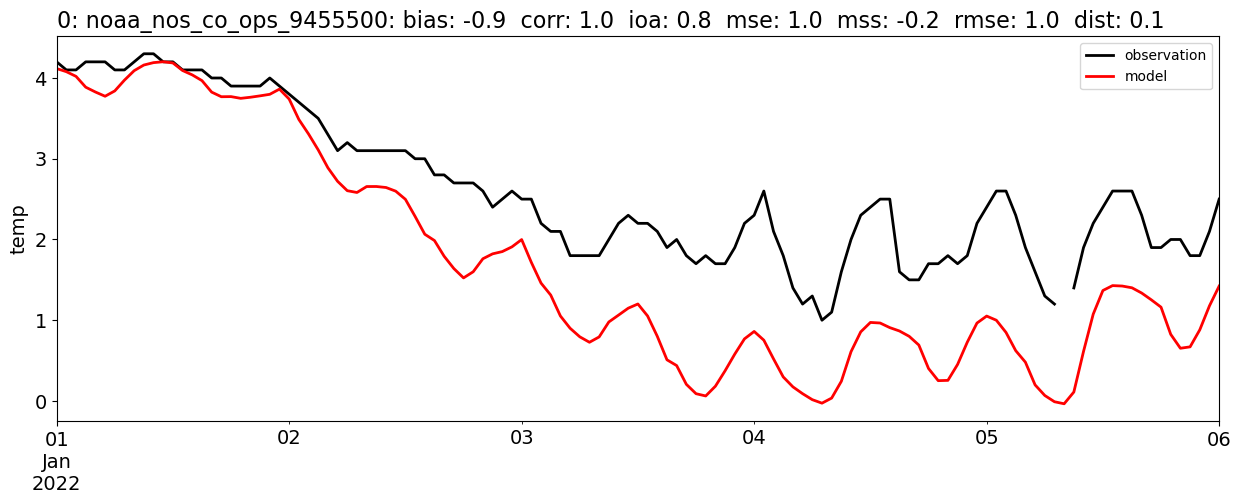

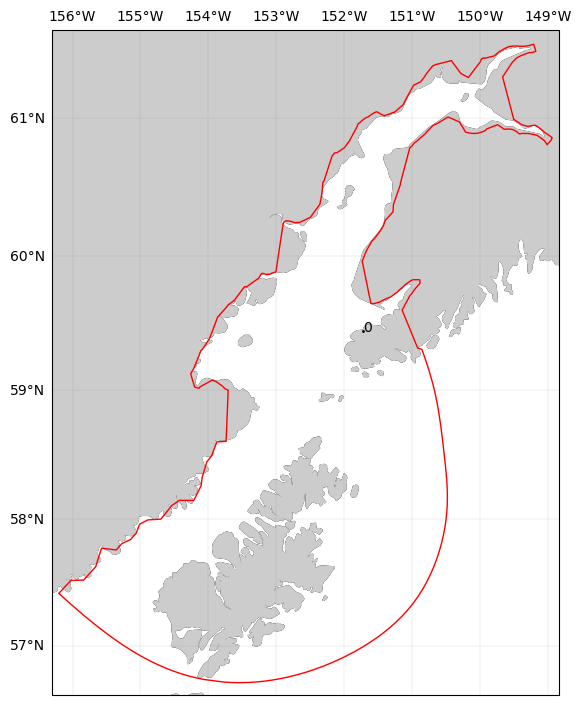

In [8]:
omsa.run(project_name="demo_local_package", catalogs=cat_data, model_name=cat_model,
         vocabs="general", key_variable="temp")

The plots show the time series comparisons for sea water temperatures of the model output and data at one location. Also shown is a map of the Cook Inlet region where the CIOFS model is located. An approximation of the numerical domain is shown along with the data location.